In [ ]:
# Basic libraries
import json
import numpy as np
import librosa
import librosa.display
print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
import os
AUDIO_DIR = "D:/Music Instrument Recognition System/nsynth-train/audio"
JSON_PATH ="D:/Music Instrument Recognition System/nsynth-train/examples.json"


OUTPUT_DIR = "D:/Music Instrument Recognition System/spectrograms/milestone1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("✅ Paths set")

✅ Paths set


In [ ]:
with open(JSON_PATH, "r") as f:
    nsynth_metadata = json.load(f)

print("Total samples in NSynth:", len(nsynth_metadata))

sample_key = list(nsynth_metadata.keys())[0]
print("Sample metadata:\n", nsynth_metadata[sample_key])

Total samples in NSynth: 289205
Sample metadata:
 {'note': 16629, 'sample_rate': 16000, 'pitch': 82, 'instrument_source': 0, 'instrument_family_str': 'guitar', 'instrument_str': 'guitar_acoustic_001', 'note_str': 'guitar_acoustic_001-082-050', 'qualities_str': ['percussive'], 'instrument_source_str': 'acoustic', 'velocity': 50, 'instrument_family': 3, 'instrument': 39, 'qualities': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]}


In [ ]:
MAX_SAMPLES_PER_CLASS = 100   # you can change to 100 later

selected_files = []
count_per_class = {k: 0 for k in instrument_family_map.keys()}

for file_id, meta in nsynth_metadata.items():
    fam = meta["instrument_family"]

    if fam in count_per_class and count_per_class[fam] < MAX_SAMPLES_PER_CLASS:
        selected_files.append((file_id, fam))
        count_per_class[fam] += 1

    if all(v == MAX_SAMPLES_PER_CLASS for v in count_per_class.values()):
        break

print("Selected samples:", len(selected_files))
print("Samples per class:", count_per_class)

Selected samples: 1100
Samples per class: {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100, 10: 100}


In [ ]:
instrument_family_map = {
    0: "bass",
    1: "brass",
    2: "flute",
    3: "guitar",
    4: "keyboard",
    5: "mallet",
    6: "organ",
    7: "reed",
    8: "string",
    9: "synth_lead",
    10: "vocal"
}

print("Instrument Families:")
for k, v in instrument_family_map.items():
    print(k, "→", v)

Instrument Families:
0 → bass
1 → brass
2 → flute
3 → guitar
4 → keyboard
5 → mallet
6 → organ
7 → reed
8 → string
9 → synth_lead
10 → vocal


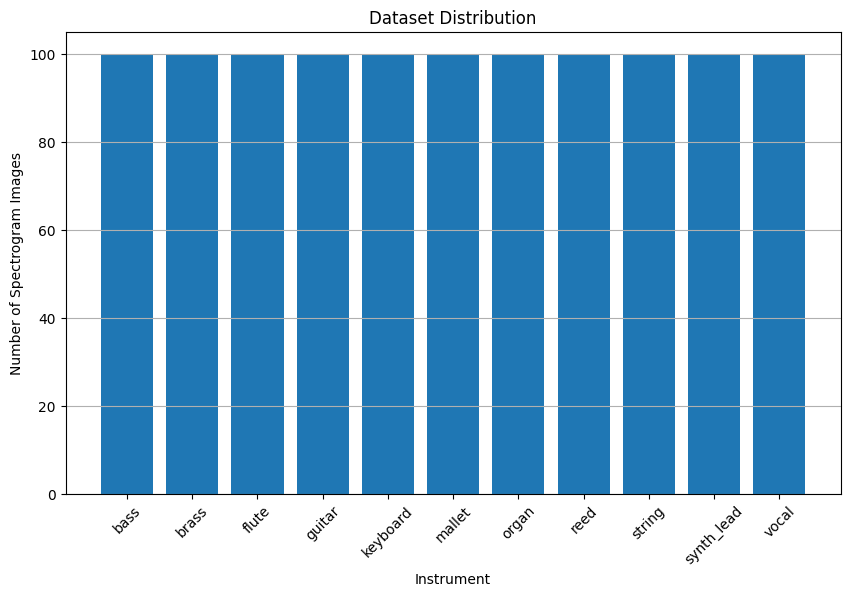

In [ ]:
import matplotlib.pyplot as plt

# Convert class IDs to instrument names
instrument_names = []
sample_counts = []

for k, v in count_per_class.items():
    instrument_names.append(instrument_family_map[k])
    sample_counts.append(v)

plt.figure(figsize=(10, 6))

plt.bar(instrument_names, sample_counts)

plt.xlabel("Instrument")
plt.ylabel("Number of Spectrogram Images")
plt.title("Dataset Distribution")

plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

OUTPUT_DIR = "D:/Music Instrument Recognition System/spectrograms/milestone1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for file_id, fam in selected_files:
    wav_path = os.path.join(AUDIO_DIR, file_id + ".wav")

    y, sr = librosa.load(wav_path, mono=True)

    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    label_name = instrument_family_map[fam]
    label_dir = os.path.join(OUTPUT_DIR, label_name)
    os.makedirs(label_dir, exist_ok=True)

    plt.figure(figsize=(3,3))
    librosa.display.specshow(mel_db, sr=sr)
    plt.axis("off")

    plt.savefig(os.path.join(label_dir, file_id + ".png"),
                bbox_inches="tight", pad_inches=0)
    plt.close()

print("Spectrograms regenerated successfully")

Spectrograms regenerated successfully


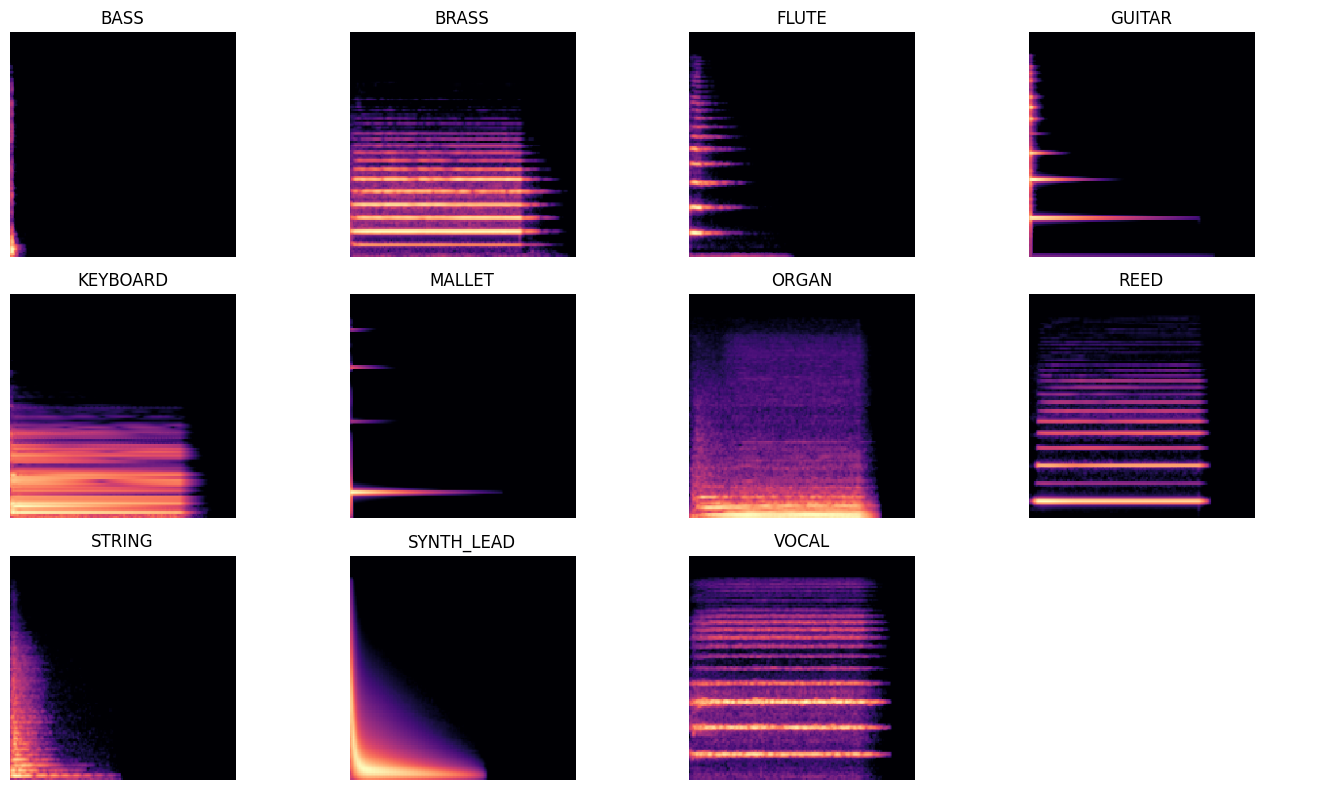

In [8]:
import os
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(14, 8))
axes = axes.flatten()

i = 0
for instrument in os.listdir(OUTPUT_DIR):
    img_folder = os.path.join(OUTPUT_DIR, instrument)

    if len(os.listdir(img_folder)) == 0:
        continue

    img_file = os.listdir(img_folder)[0]
    img_path = os.path.join(img_folder, img_file)

    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(instrument.upper())
    axes[i].axis("off")
    i += 1

# hide unused subplots (important)
for j in range(i, len(axes)):
    axes[j].axis("off")

plt.tight_layout()

plt.show()


In [9]:
import os

print("Spectrogram folders:")
for folder in os.listdir("spectrograms/milestone1"):
    path = os.path.join("spectrograms/milestone1", folder)
    print(folder, "→", len(os.listdir(path)), "files")


Spectrogram folders:
bass → 100 files
brass → 100 files
flute → 100 files
guitar → 100 files
keyboard → 100 files
mallet → 100 files
organ → 100 files
reed → 100 files
string → 100 files
synth_lead → 100 files
vocal → 100 files


In [15]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)


In [16]:
train_data = datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)


Found 880 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(train_data.num_classes, activation="softmax")
])


d:\python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
EPOCHS = 20

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 52s 873ms/step - accuracy: 0.1398 - loss: 11.4854 - val_accuracy: 0.0909 - val_loss: 21.4690
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 694ms/step - accuracy: 0.1330 - loss: 3.7732 - val_accuracy: 0.0909 - val_loss: 26.7601
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 679ms/step - accuracy: 0.1398 - loss: 3.1470 - val_accuracy: 0.0909 - val_loss: 36.3057
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.1375 - loss: 2.7602 - val_accuracy: 0.0909 - val_loss: 9.9616
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.1318 - loss: 2.5359 - val_accuracy: 0.1182 - val_loss: 8.1239
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.1284 - loss: 2.3967 - val_accuracy: 0.0455 - val_loss: 3.8028
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.1182 - loss: 2.5058 - val_accuracy: 0.1500 - val_loss: 2.8444
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 933ms/step - accuracy: 0.1170 - loss: 2.3998 - val_accuracy: 0.

In [ ]:
train_loss, train_acc = model.evaluate(train_data)
val_loss, val_acc = model.evaluate(val_data)

print("Training Accuracy:", round(train_acc*100, 2), "%")
print("Validation Accuracy:", round(val_acc*100, 2), "%")


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9875 - loss: 0.0541
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3909 - loss: 3.3894
Training Accuracy: 98.75 %
Validation Accuracy: 39.09 %


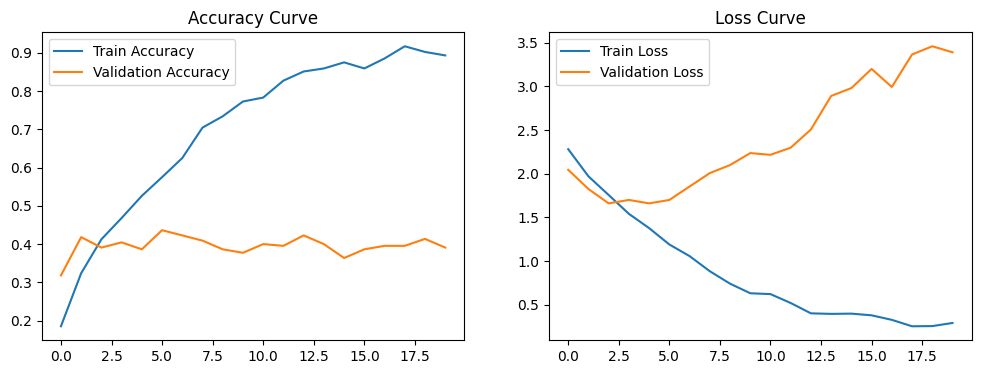

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# path to one spectrogram image
img_path = "D:\Music Instrument Recognition System\spectrograms\milestone1\guitar\guitar_acoustic_000-074-100.png"

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\likhi\AppData\Local\Temp\ipykernel_22788\1051484621.py:5: SyntaxWarning: invalid escape sequence '\M'
  img_path = "D:\Music Instrument Recognition System\spectrograms\milestone1\guitar\guitar_acoustic_000-074-100.png"


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "D:/Music Instrument Recognition System/spectrograms/milestone1/guitar/sample.png"

img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
idx = np.argmax(pred)
confidence = pred[0][idx] * 100

labels = list(train_data.class_indices.keys())

print("Predicted Instrument:", labels[idx])
print("Confidence:", round(confidence, 2), "%")